In [35]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from random import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
#from tensorflow.keras import layers

In [2]:
dataset_dir = './dataset'
male_eyes = f'{dataset_dir}/maleeyes'
female_eyes = f'{dataset_dir}/femaleeyes'

## create dataframe

In [3]:
male_eyes_files = [[os.path.join(male_eyes, filename), 'male'] for filename in os.listdir(male_eyes)]
female_eyes_files = [[os.path.join(female_eyes, filename), 'female'] for filename in os.listdir(female_eyes)]

balance the data

In [4]:
len(male_eyes_files)

6323

In [5]:
len(female_eyes_files)

5202

In [6]:
male_eyes_files = male_eyes_files[:5202]

In [7]:
len(male_eyes_files) == len(female_eyes_files)

True

In [8]:
eyes_files = male_eyes_files + female_eyes_files

In [9]:
df = pd.DataFrame(eyes_files, columns=['image_path', 'label'])

In [10]:
df.describe()

,image_path,label
count,10404,10404
unique,10404,2
top,./dataset/maleeyes/63.jpg,male
freq,1,5202


In [11]:
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
df

,image_path,label
0,./dataset/femaleeyes/6550.jpg,female
1,./dataset/maleeyes/5094.jpg,male
2,./dataset/femaleeyes/5553.jpg,female
3,./dataset/femaleeyes/4575.jpg,female
4,./dataset/femaleeyes/5001.jpg,female
...,...,...
10399,./dataset/maleeyes/4606.jpg,male
10400,./dataset/maleeyes/3657.jpg,male
10401,./dataset/femaleeyes/432.jpg,female
10402,./dataset/femaleeyes/3924.jpg,female


In [13]:
df.isna().any()

image_path    False
label         False
dtype: bool

## explore the images

In [14]:
female_eye = df[df['label'] == 'female'].iloc[0]['image_path']
male_eye = df[df['label'] == 'male'].iloc[0]['image_path']

Text(0.5, 1.0, 'female eye')

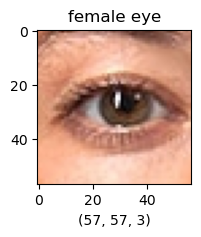

In [15]:
figure = plt.figure(figsize=(2,2))
image = plt.imread(female_eye)
plt.imshow(image)
plt.xlabel(image.shape)
plt.title('female eye')

Text(0.5, 1.0, 'male eye')

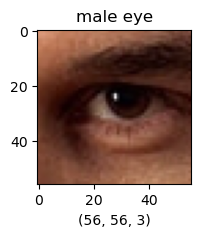

In [16]:
figure = plt.figure(figsize=(2,2))
image = plt.imread(male_eye)
plt.imshow(image)
plt.xlabel(image.shape)
plt.title('male eye')

Those two samples have different sizes, let's resize all images to the same size for better classification

In [17]:
size_set = set()
for image in df['image_path']:
    x, y, _ = plt.imread(image).shape
    size_set.add((x,y))
len(size_set)

66

In [18]:
sorted_sizes = list(sorted(size_set))
smallest_image = sorted_sizes[0]
largest_image = sorted_sizes[-1]

In [19]:
print('smallest: ', smallest_image)
print('largest:', largest_image)

smallest:  (41, 41)
largest: (117, 117)


In [28]:
df_1 = df.copy()
df_1 = df_1.rename(columns={'image_path':'image'})

In [29]:
size = (41, 41)
for i in range(len(df)):
    image = cv2.imread(df['image_path'][i])
    image = cv2.resize(image, size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    df_1['image'][i] = image.flatten()

In [30]:
df_1.head()

,image,label
0,"[196, 125, 95, 184, 115, 89, 159, 98, 77, 129,...",female
1,"[215, 150, 119, 216, 151, 119, 211, 145, 113, ...",male
2,"[107, 72, 48, 108, 72, 50, 115, 78, 56, 133, 9...",female
3,"[221, 180, 148, 228, 187, 158, 229, 191, 163, ...",female
4,"[58, 33, 4, 94, 60, 30, 119, 77, 44, 130, 90, ...",female


## CNN model

encode labels

In [36]:
labelEncoder = LabelEncoder()
df_1['label'] = np.asarray(labelEncoder.fit_transform(df_1['label']))

In [37]:
df_1.head()

,image,label
0,"[196, 125, 95, 184, 115, 89, 159, 98, 77, 129,...",0
1,"[215, 150, 119, 216, 151, 119, 211, 145, 113, ...",1
2,"[107, 72, 48, 108, 72, 50, 115, 78, 56, 133, 9...",0
3,"[221, 180, 148, 228, 187, 158, 229, 191, 163, ...",0
4,"[58, 33, 4, 94, 60, 30, 119, 77, 44, 130, 90, ...",0
